### Import Libraries 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler() 
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import precision_recall_curve,average_precision_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import auc
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.model_selection import KFold
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
import shap
from sklearn.metrics import plot_confusion_matrix

## Upload Datasets

In [3]:
df=pd.read_csv("Thyroid_Diff.csv")

In [4]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [5]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [7]:
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [8]:
df.shape

(383, 17)

In [9]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [10]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [11]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'Age':
[27 34 30 62 52 41 46 51 40 75 59 49 50 76 42 44 43 36 70 60 33 26 37 55
 31 45 20 38 29 25 21 23 24 35 54 22 69 28 17 73 18 39 57 66 32 47 56 63
 19 67 72 61 68 48 81 53 58 80 79 65 15 82 71 64 78]

Unique values in column 'Gender':
['F' 'M']

Unique values in column 'Smoking':
['No' 'Yes']

Unique values in column 'Hx Smoking':
['No' 'Yes']

Unique values in column 'Hx Radiothreapy':
['No' 'Yes']

Unique values in column 'Thyroid Function':
['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']

Unique values in column 'Physical Examination':
['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']

Unique values in column 'Adenopathy':
['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']

Unique values in column 'Pathology':
['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']

Unique values in column 'Focality':
['Uni

## Age Distribution of Patients

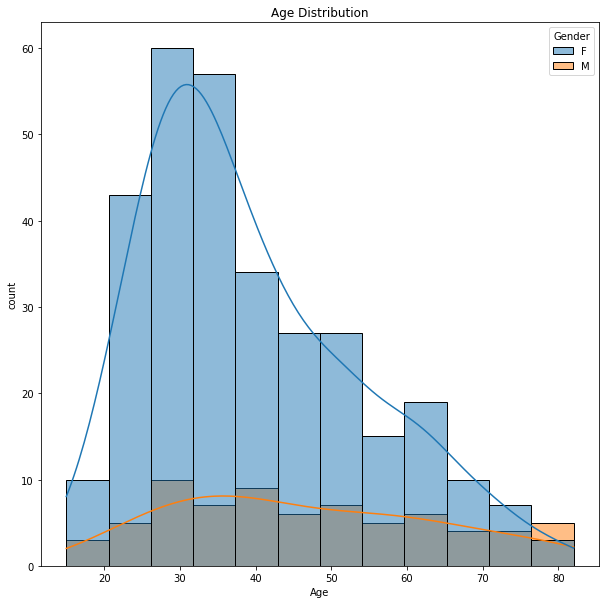

In [12]:

plt.figure(figsize=(10,10))
sns.histplot(x='Age',hue='Gender',data=df,kde=True,color='blue',edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

Text(0, 0.5, 'Count')

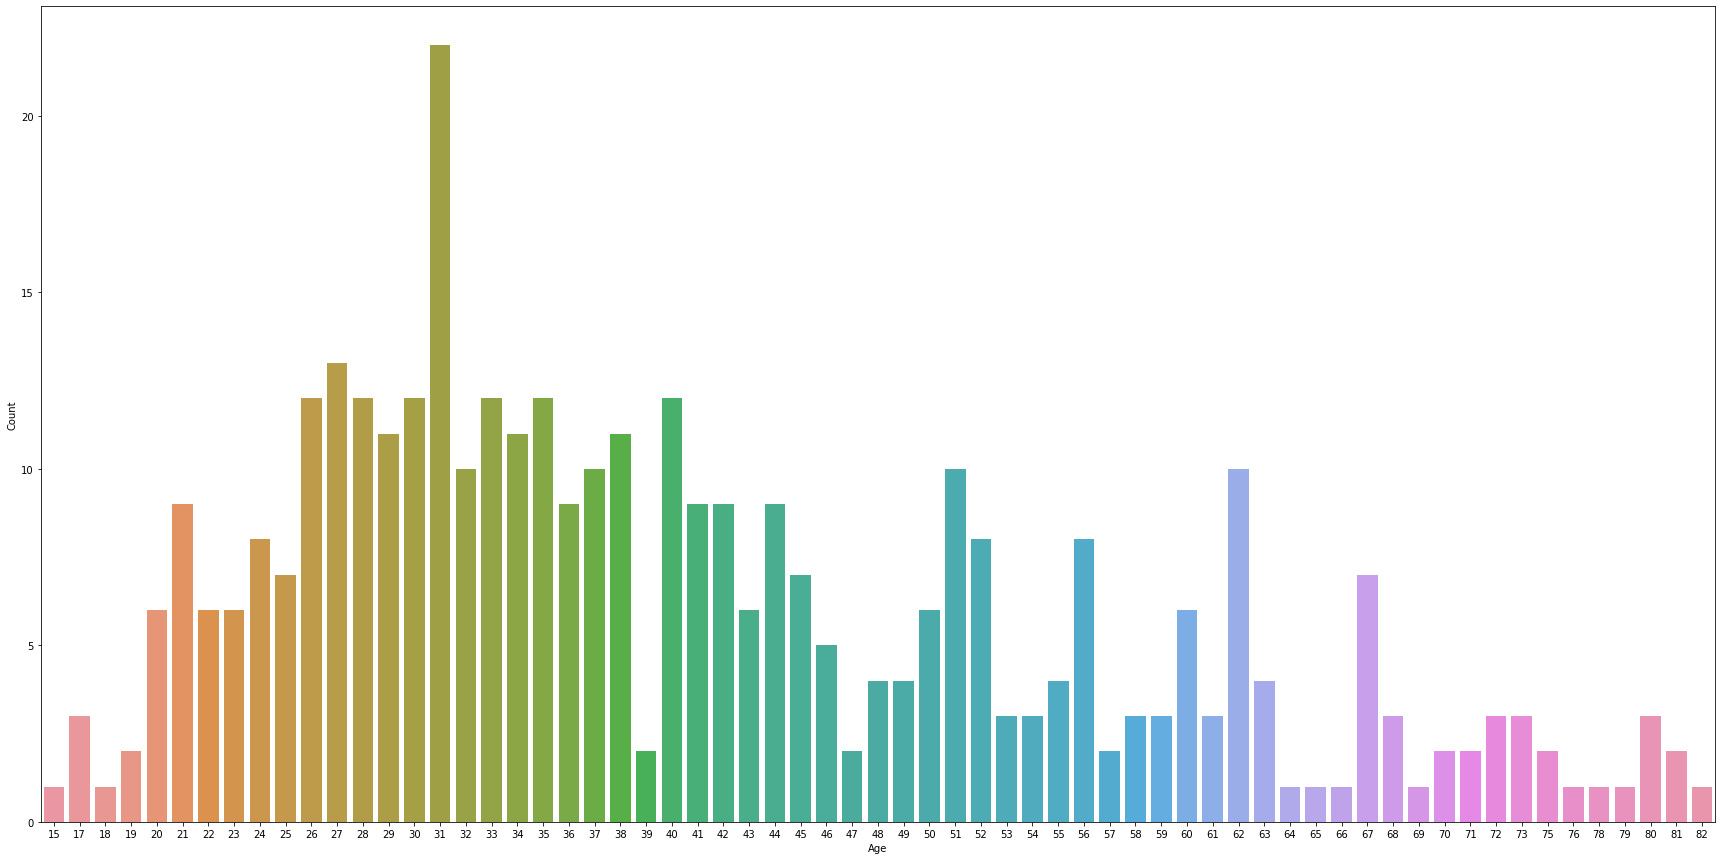

In [13]:
plt.figure(figsize=(30,15))
sns.countplot(x='Age',data=df)
plt.xlabel('Age')
plt.ylabel('Count')

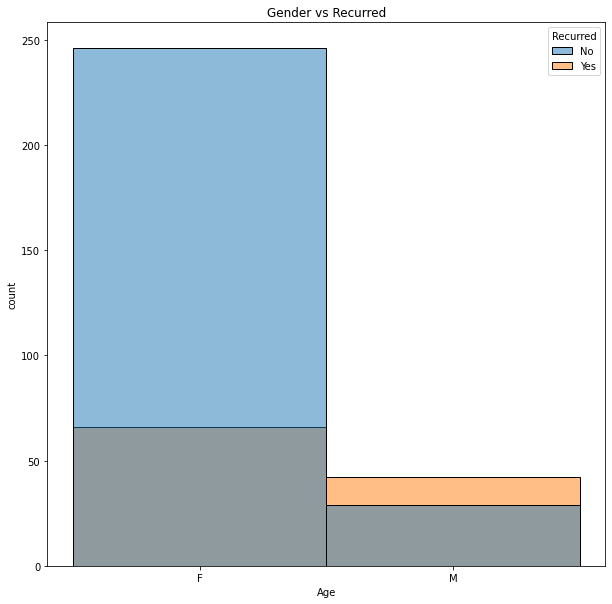

In [14]:
plt.figure(figsize=(10,10))
sns.histplot(x='Gender',hue='Recurred',data=df,color='darkblue',edgecolor='black')
plt.title('Gender vs Recurred')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

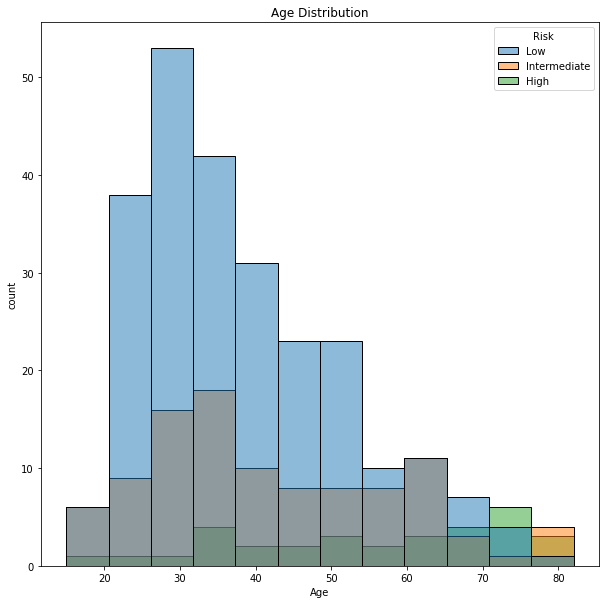

In [15]:
colors=['red','darkblue','yellow']
plt.figure(figsize=(10,10))
sns.histplot(x='Age',hue='Risk',data=df,color=colors,edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

## Tranform categorical label to numerical label

In [16]:
le=LabelEncoder()

In [17]:
for column in df.columns:
    if df[column].dtype==object:
        df[column]=le.fit_transform(df[column])
    

In [18]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,2,4,5,3,1,0,6,2,1,4,0,1
379,81,1,1,0,1,2,1,1,3,0,0,6,2,1,4,3,1
380,72,1,1,1,0,2,1,0,3,0,0,6,2,1,4,3,1
381,61,1,1,1,1,0,1,1,1,0,0,6,2,0,3,3,1


In [19]:
df.rename(columns={'Hx Smoking': 'Smoking History',
                   'Hx Radiothreapy': 'Radiotherapy History',
                   'Pathology': 'Types of Thyroid Cancer (Pathology)',
                   'T': 'Tumor',
                   'N': 'Lymph Nodes',
                   'M': 'Cancer Metastasis',
                  'Response' : 'Treatment Response'}, inplace=True)

In [20]:
df

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid Function,Physical Examination,Adenopathy,Types of Thyroid Cancer (Pathology),Focality,Risk,Tumor,Lymph Nodes,Cancer Metastasis,Stage,Treatment Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,0,0,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,0,0,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,0,0,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,2,4,5,3,1,0,6,2,1,4,0,1
379,81,1,1,0,1,2,1,1,3,0,0,6,2,1,4,3,1
380,72,1,1,1,0,2,1,0,3,0,0,6,2,1,4,3,1
381,61,1,1,1,1,0,1,1,1,0,0,6,2,0,3,3,1


In [21]:
df1=df.drop("Recurred",axis=1)

In [22]:
x=df1
y=df['Recurred']


## Split data set

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=76)

In [24]:
x_train.shape,x_test.shape

((306, 16), (77, 16))

In [25]:
scaler=StandardScaler()
x_scale_train=scaler.fit_transform(x_train)
x_scale_test=scaler.transform(x_test)

C:\Users\KRISHANU BAKSHI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


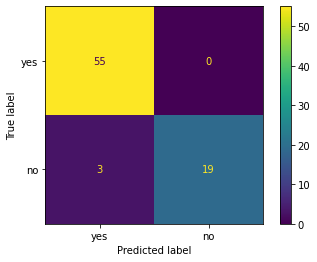

In [26]:
clf=DecisionTreeClassifier(max_depth=10,min_samples_split=100,criterion='gini')
clf.fit(x_scale_train,y_train)
predict=clf.predict(x_scale_test)
dt_accuracy=(accuracy_score(y_test,predict))
dt_cm=plot_confusion_matrix(clf,x_scale_test,y_test,display_labels=['yes','no'])
dt_report=classification_report(y_test,predict)

In [27]:
print("dt_accuracy:",dt_accuracy)
print(dt_cm)
print(dt_report)

dt_accuracy: 0.961038961038961
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        55
           1       1.00      0.86      0.93        22

    accuracy                           0.96        77
   macro avg       0.97      0.93      0.95        77
weighted avg       0.96      0.96      0.96        77



In [28]:
y_probs=clf.predict(x_scale_test)

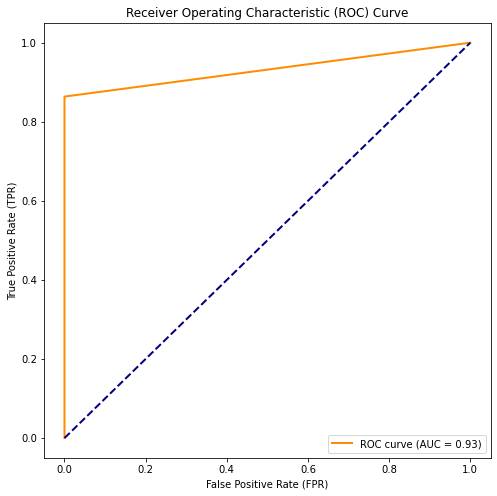

AUC: 0.9318181818181819


In [29]:
fpr,tpr,_=roc_curve(y_test,y_probs[:,])
roc_auc=auc(fpr,tpr)
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_auc)

In [30]:
xgb_model=XGBClassifier()
param_grid={
    'max_depth':[None, 5, 10, 15, 20],
    'n_estimators':[50,100,150,200,250,300],
    'learning_rate':[0.1,0.001,0.0001,0.5],
    'sampling_method':['uniform','gradient_based'],
    'booster':['gbtree', 'gblinear']    
}
grid=GridSearchCV(estimator=xgb_model,param_grid=param_grid,cv=3,n_jobs=-1)
grid.fit(x_scale_train,y_train)

C:\Users\KRISHANU BAKSHI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
38 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\KRISHANU BAKSHI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\KRISHANU BAKSHI\anaconda3\lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
  File "C:\Users\KRISHANU BAKSHI\anaconda3\lib\site-packages\xgboost\sklearn.py", line 1519, in fit
    self._Booster = train(
  File "C:\Users\KRISHANU BAKSHI\a

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num

In [31]:
best_params=grid.best_params_
print("best_params:",best_params)

best_params: {'booster': 'gbtree', 'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 100, 'sampling_method': 'uniform'}


C:\Users\KRISHANU BAKSHI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


xgb_accuracy: 0.961038961038961
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.95      0.91      0.93        22

    accuracy                           0.96        77
   macro avg       0.96      0.95      0.95        77
weighted avg       0.96      0.96      0.96        77



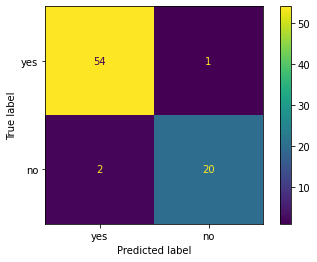

In [32]:
best_xgb_estimator=grid.best_estimator_
predict=best_xgb_estimator.predict(x_scale_test)
xgb_accuracy=accuracy_score(y_test,predict)
xgb_cm=plot_confusion_matrix(grid,x_scale_test,y_test,display_labels=['yes','no'])
xgb_report=classification_report(y_test,predict)
print("xgb_accuracy:",xgb_accuracy)
print(xgb_cm)
print(xgb_report)

In [33]:
proba=best_xgb_estimator.predict(x_scale_test)
fpr,tpr,_=roc_curve(y_test,proba)
roc_auc=auc(fpr,tpr)
print(roc_auc)

0.9454545454545454


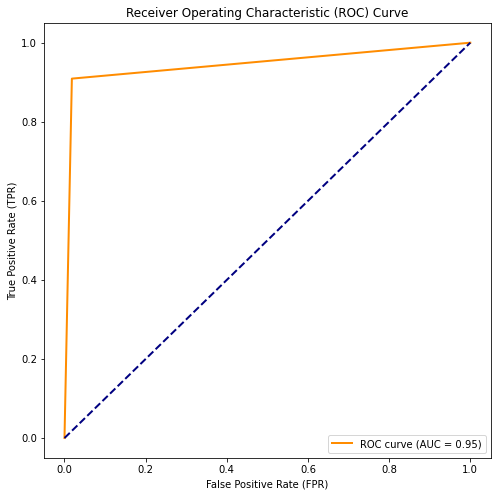

AUC: 0.9454545454545454


In [40]:
probability=grid.predict(x_scale_test)
fpr,tpr,_=roc_curve(y_test,probability)
roc_auc=auc(fpr,tpr)
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_auc)

rf_accuracy: 0.974025974025974
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        57
           1       0.91      1.00      0.95        20

    accuracy                           0.97        77
   macro avg       0.95      0.98      0.97        77
weighted avg       0.98      0.97      0.97        77



C:\Users\KRISHANU BAKSHI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


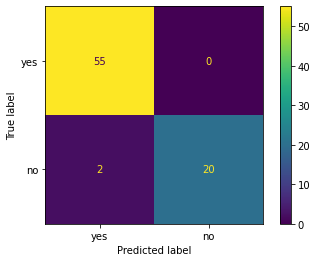

In [35]:
rf=RandomForestClassifier()
rf.fit(x_scale_train,y_train)
y_pred=rf.predict(x_scale_test)
rf_accuracy=accuracy_score(y_pred,y_test)
rf_cm=plot_confusion_matrix(rf,x_scale_test,y_test,display_labels=['yes','no'])
rf_report=classification_report(y_pred,y_test)
print("rf_accuracy:",rf_accuracy)
print(rf_cm)
print(rf_report)

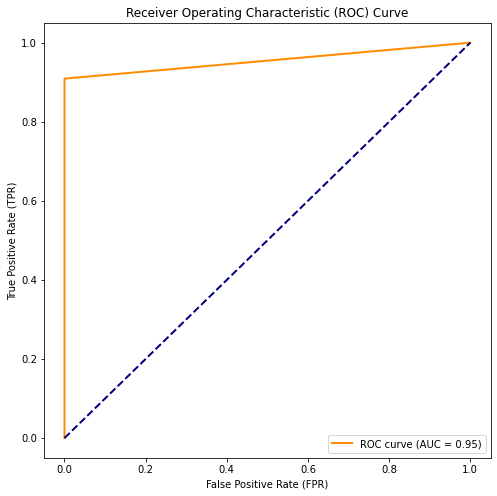

AUC: 0.9545454545454546


In [36]:
probability=rf.predict(x_scale_test)
fpr,tpr,_=roc_curve(y_test,probability)
roc_auc=auc(fpr,tpr)
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_auc)

In [37]:
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_scale_train,y_train)
y_pred=ada.predict(x_scale_test)
ada_accuracy=accuracy_score(y_pred,y_test)
print("ada_accuracy:",ada_accuracy)

ada_accuracy: 0.9090909090909091


              precision    recall  f1-score   support

           0       0.93      0.94      0.94        54
           1       0.86      0.83      0.84        23

    accuracy                           0.91        77
   macro avg       0.90      0.89      0.89        77
weighted avg       0.91      0.91      0.91        77



C:\Users\KRISHANU BAKSHI\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


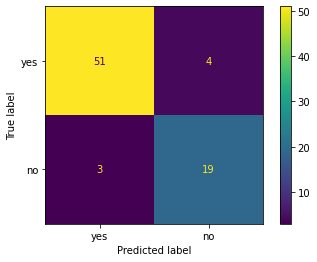

In [38]:
ada_cm=plot_confusion_matrix(ada,x_scale_test,y_test,display_labels=['yes','no'])
ada_report=classification_report(y_pred,y_test)
print(ada_cm)
print(ada_report)

0.8954545454545455


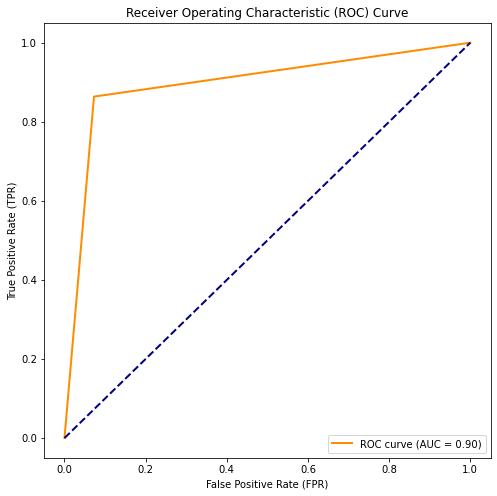

AUC: 0.8954545454545455


In [39]:
y_proba=ada.predict(x_scale_test)
fpr,tpr,_=roc_curve(y_test,y_proba)
roc_auc=auc(fpr,tpr)
print(roc_auc)
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
print('AUC:', roc_auc)

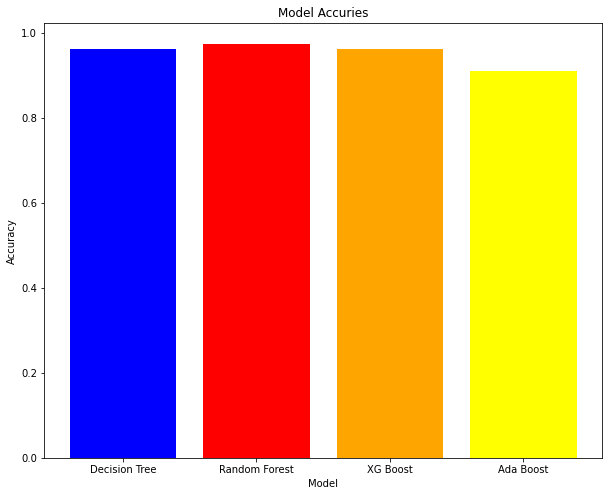

In [42]:
plt.figure(figsize=(10,8))
labels=['Decision Tree','Random Forest','XG Boost','Ada Boost']
accuracy=[dt_accuracy,rf_accuracy,xgb_accuracy,ada_accuracy]
plt.bar(labels,accuracy,color=['blue','red','orange','yellow'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuries")
plt.show()

In [43]:
importances=rf.feature_importances_

In [45]:
indices = np.argsort(importances)[::-1]
sorted_feature_names = [importances[i] for i in indices]

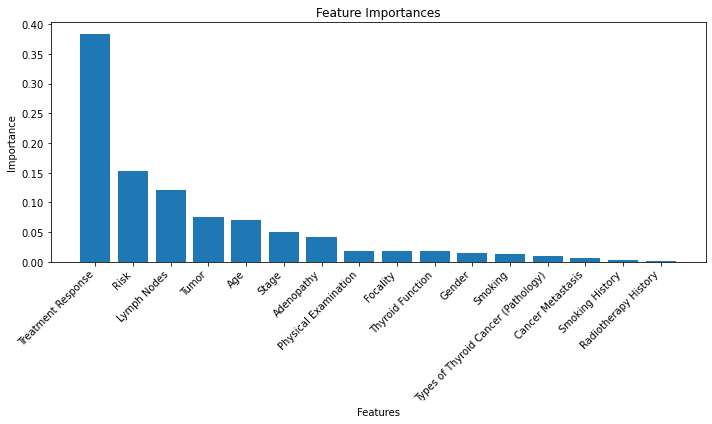

In [177]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(x.shape[1]), importances[indices])
plt.xticks(range(x.shape[1]), sorted_feature_names, rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
#for decision tree

In [49]:
precision=(55/55+0)
print(precision)

1.0


In [50]:
recall=55/(55+3)
print(recall)

0.9482758620689655


In [51]:
f_score = 2 * precision * recall / (precision + recall)
print(f_score)

0.9734513274336283


In [52]:
# for xg boost

In [53]:
precision2=(54/(54+1))
precision2

0.9818181818181818

In [54]:
recall2=54/(54+2)
print(recall2)

0.9642857142857143


In [55]:
f_score=2 * precision2 * recall2/(precision2+recall2)
f_score

0.972972972972973

In [56]:
# for random forest

In [57]:
precision3=(55/(55+0))
precision3

1.0

In [58]:
recall3=(55/(55+2))
recall3

0.9649122807017544

In [59]:
f_score= 2 * precision3 * recall3/(precision3+recall3)
f_score

0.9821428571428572

In [60]:
#for ada boost

In [61]:
precision4=(51/(51+4))
precision4

0.9272727272727272

In [62]:
recall4=(51/(51+3))
recall4

0.9444444444444444

In [63]:
f_score= 2 * precision4 * recall4/(precision4+recall4)
f_score

0.9357798165137615

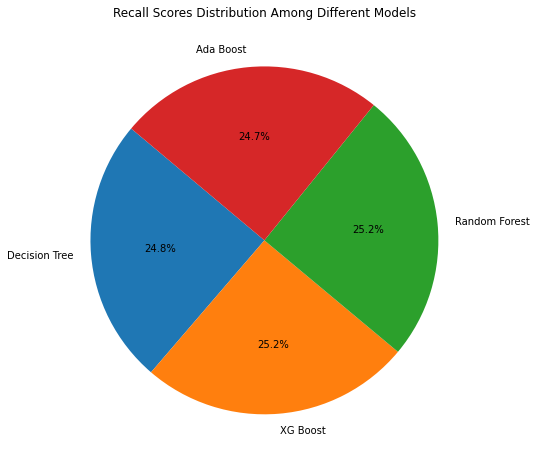

In [66]:
import matplotlib.pyplot as plt

# Sample recall scores
recall_scores = [recall, recall2, recall3, recall4]
labels = ['Decision Tree', 'XG Boost', 'Random Forest', 'Ada Boost']

# Create a pie chart
plt.figure(figsize=(15, 8))
plt.pie(recall_scores, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Recall Scores Distribution Among Different Models')
plt.show()


## After Exploratory Data Analysis part, we initially went to the classification work. To classify a patient is cure or not we use several types of machine learning models and random forest fit well and boosting an impressive recall score of 0.9649. This model not only classify the patient cure or not but also check which features are mostly impact in thyroid cancer and the model found that treatment response, risk, Age, Size of Tumour, stage of the cancer is mostly important feature. The higher age of the patient less chance of the cure from the cancer. Also, in the Phase of III & Phase IV stage of cancer is less cure rate. Although the patient are responds from the treatment really well.
## In medical data analytics field lot of time we found imbalance data set. In imbalance data set we found that there is one class label dominating the other class label. In such cases, model might achieve high accuracy simply by predicting the majority of the class most of the time. However, this would not be helpful in identifying the minority class which often the primary concern. On the other hand recall score means True positive/(True positive + False Negative)
## So, recall score basically explain positive class that means how my model correctly said that how many patients had cancer. The most important think is if the false negative value is much lower than the recall score is higher than it can be said that the model classifies the patient really well. So, the basic difference of recall score and accuracy score is accuracy measure the overall correctness considering both positive and negative prediction where recall only focus the positive instance. Secondly, Accuracy can be misleading with imbalance data set whether recall address the performance of the minority class. When accuracy provides a general measure of model’s performances recall is essential for ensuring that the positive cases are not missed. That’s why in my project I used recall score over the accuracy.